## Gauss Newton Algorithm 

The Gauss–Newton algorithm is used to solve non-linear least squares problems. It is a modification of Newton's method for finding a minimum of a function. Unlike Newton's method, the Gauss–Newton algorithm can only be used to minimize a sum of squared function values, but it has the advantage that second derivatives, which can be challenging to compute, are not required.

Non-linear least squares problems arise for instance in non-linear regression, where parameters in a model are sought such that the model is in good agreement with available observations.

We use Gauss-Newton algorithm to minimize the cost function. The cost function in our case is the difference between the known 'gravitational and earth's magnetic vectors' and the (sensors accelerometer and magnetometer) readings transformed to the Earth frame. 



We use the data from the sensors for acceleration and magnetic vectors as observation vectors. They are symbolized as 

\begin{equation}
A_{Device} = (a_{xb}, a_{yb}, a_{zb})
\end{equation}

\begin{equation}
M_{Device} = (m_{xb}, m_{yb}, m_{zb})
\end{equation}

In the Earth's frame of reference, the acceleration and magnetic vector represetation is 
\begin{equation}
A_{Earth} = (0, g, 0)
\end{equation}

Where, $g$ is Earth's gravitational acceleration equal to $9.8 m/s^2$
\begin{equation}
M_{Earth} = (m_{xE}, m_{yE}, m_{zE})
\end{equation}

By combining the vecotrs in each of the references we get 
\begin{equation}
Y_{Earth} = (0, g, 0, m_{xE}, m_{yE}, m_{zE})
\end{equation}

\begin{equation}
Y_{device} = (a_{xb}, a_{yb}, a_{zb}, m_{xb}, m_{yb}, m_{zb})
\end{equation}




The rotation matrix that shall rotate the device vector to the Earth vector, in quaternion form is : 


$$\mathbf{R_{t}} = \left[\begin{array}
{rrr}
M_{t} & 0 \\
0 & M_{t} 
\end{array}\right]
$$

Where the matrix M is described as : 
$$\mathbf{M_{t}} = \left[\begin{array}
{rrr}
q_4^2+q_1^2-q_2^2-q_3^2 & 2(q_1q_2-q_3q_4) & 2(q_1q_3 + q_2q_4) \\
2(q_1q_2 + q_3q_4) & q_4^2+q_2^2-q_1^2-q_3^2 & 2(q_2q_3-q_4q_1)\\
2(q_1q_3 - q_2q_4) & 2(q_3q_2+q_1q_4) & q_4^2+q_3^2-q_1^2-q_2^2)
\end{array}\right]
$$

The Gauss-Newton optimization method is used to minimize discrepancy between
actual and computed measurement vectors as below equation : 

\begin{equation}
\epsilon  = Y_{Earth} - R_{t}.Y_{Device}
\end{equation}

The Gauss-Newton method executes following iteration:

\begin{equation}
 q_t = q_{t-1} - (J_{t}^T.J_{t})^{-1}.J_{t}^T.\epsilon
\end{equation}


Where $J_k$ is the Jacobian of $\epsilon$ calculated in $q_k$ as is shown in below equation
\begin{equation}
 J_{t}(q_{k}(t)) = \frac{\partial \epsilon}{\partial (q_{k}(t))} = - [ (\frac{\partial R}{\partial (q_{1})} . Y_{Device(t)})(\frac{\partial R}{\partial (q_{2})} . Y_{Device(t)})((\frac{\partial R}{\partial (q_{3})} . Y_{Device(t)}))((\frac{\partial R}{\partial (q_{4})} . Y_{Device(t)}))  ]  
\end{equation}
 
and solving Jacobian.


This is the New cell added.

In [32]:
import math
import numpy as np
from numpy import linalg as la

class GaussNewtonOptimization:
    """
    Class string
    """
    ## class variables : to be used later 
    counter = 0
    depth = 6
    
    def __call__(self):
        GaussNewtonOptimization.counter += 1
        return GaussNewtonOptimization.counter
    
    def __init__(self, Q1,Q2,Q3,Q4,Ax,Ay,Az,Mx,My,Mz):
        self.Q1 = Q1
        self.Q2 = Q2
        self.Q3 = Q3
        self.Q4 = Q4
        
        self.Ax = Ax
        self.Ay = Ay
        self.Az = Az
        
        self.Mx = Mx
        self.My = My
        self.Mz = Mz
        
        ## added changes considering equation 4.67 from page 60
        self.Q_now = list([self.Q1,self.Q2,self.Q3,self.Q4])

    
    def norm(Q):
        """
        return the norm of the Quaternion.
        """
        return sum( i*i for i in Q)

    def Gaussnewton(self):
        """
        Gauss Newton Algorithm : returns the Quaternion derived from Accelerometer and Magnetometer,
        iterated 10 times. 
        """
        Q1 = self.Q1
        Q2 = self.Q2 
        Q3 = self.Q3 
        Q4 = self.Q4 
        
        Ax = self.Ax 
        Ay = self.Ay 
        Az = self.Az 
        
        Mx = self.Mx 
        My = self.My
        Mz = self.Mz 
        
        # reference Attitude
        EarthFrame = np.matrix([[0], [1] , [0], [0], [-0.03751], [0.92696]])
        BodyFrame = np.matrix([[Ax], [Ay] , [Az], [Mx], [My], [Mz]])
        
        
        Q_now = list([Q1,Q2,Q3,Q4])
        #self.Q_now
        #normalize
        Q_now = [x / GaussNewtonOptimization.norm(Q_now) for x in Q_now]   
               
        q1 = Q_now[0] ; q2 = Q_now[1] ; q3 = Q_now[2] ; q4 = Q_now[3] 
        #from list to a column matrix
        Q_now = np.matrix(Q_now).transpose()
        #temp = Q_now
        
        
        for i in range(0,GaussNewtonOptimization.depth):
            ## Compute Mt matrix

            # The rotation matrix that rotates the "body vector" to the "Earth vector", in Quaternion form, 
            # is expressed in equation XX of the article; which has Mt matrix in it. 

            ## elements of Mt matrix 
            mm11 = (q4**2+q1**2-q2**2-q3**2)  ;   mm12 = 2*(q1*q2-q3*q4)           ;  mm13 = 2*(q1*q3+q2*q4)
            mm21 = 2*(q1*q2+q3*q4)            ;   mm22 = (q4**2+q2**2-q1**2-q3**2) ;  mm23 = 2*(q2*q3-q4*q1)
            mm31 = 2*(q1*q3-q2*q4)            ;   mm32 = 2*(q3*q2+q1*q4)           ;  mm33 = (q4**2+q3**2-q1**2-q2**2)  

            Mt = np.matrix([[mm11, mm12, mm13], [mm21, mm22, mm23] , [mm31, mm32, mm33]])
            zero33 = np.matrix(np.zeros((3,3)))  

            ## Rotation Matrix (6 * 6)
            Rt = np.hstack((np.vstack((Mt,zero33)),np.vstack((zero33,Mt))))

            ## Jacobian Computation 

            j11 = 2*(q1*Ax + q2*Ay + q3*Az)
            j12 = 2*(-q2*Ax +  q1*Ay + q4*Az) 
            j13 = 2*(q3*Ax - q4*Ay + q1*Az)
            j14 = 2*(q4*Ax - q3*Ay + q2*Az)

            j21 = 2*(q2*Ax - q1*Ay - q4*Az)
            j22 = 2*(q1*Ax - q1*Ay - q4*Az)
            j23 = 2*(q4*Ax - q3*Ay + q2*Az)
            j24 = 2*(q3*Ax + q4*Ay - q1*Az)

            j31 = 2*(q3*Ax + q4*Ay - q1*Az)
            j32 = 2*(-q4*Ax + q3*Ay - q2*Az)
            j33 = 2*(q1*Ax + q2*Ay + q3*Az)
            j34 = 2*(q2*Ax + q1*Ay + q4*Az)

            j41 = 2*(q1*Mx + q2*My + q3*Mz)
            j42 = 2*(-q2*Mx + q1*My + q4*Mz)
            j43 = 2*(-q3*Mx - q4*My + q1*Mz)
            j44 = 2*(q4*Mx - q3*My + q2*Mz)

            j51 = 2*(q2*Mx - q1*My - q4*Mz)
            j52 = 2*(q1*Mx + q2*My + q3*Mz)
            j53 = 2*(q4*Mx - q3*My + q2*Mz)
            j54 = 2*(q3*Mx + q4*My - q1*Mz)

            j61 = 2*(q3*Mx + q4*My - q1*Mz)
            j62 = 2*(-q4*Mx + q3*My - q2*Mz)
            j63 = 2*(q1*Mx + q2*My + q3*Mz)
            j64 = 2*(-q2*Mx + q1*My + q4*Mz)

            Mt = np.matrix([[mm11, mm12, mm13], [mm21, mm22, mm23] , [mm31, mm32, mm33]])
            Jacobian_matrix = -np.matrix([[j11,j12,j13,j14],
                                         [j21,j22,j23,j24],
                                         [j31,j32,j33,j34],
                                         [j41,j42,j43,j44],
                                         [j51,j52,j53,j54],
                                         [j61,j62,j63,j64],                                  
                                        ])

            f = EarthFrame - (Rt * BodyFrame)
            
            
            ## Gauss Newton
            Q_next = Q_now - (la.inv(Jacobian_matrix.transpose()*Jacobian_matrix ) ) * (Jacobian_matrix.transpose() * f)
            
            #normalize (do not renormalise in Kalman filter)
            Q_next = [x / GaussNewtonOptimization.norm(np.array(Q_next).flatten()) for x in np.array(Q_next).flatten()]  
            
            
            
            # update quaternions
            q1 = Q_next[0] ; q2 = Q_next[1] ; q3 = Q_next[2] ; q4 = Q_next[3] 
            Q_now = np.matrix(Q_next).transpose()
            
            #End of 'for' loop
            
        q1 = Q_next[0] ; q2 = Q_next[1] ; q3 = Q_next[2] ; q4 = Q_next[3]
        return q1,q2,q3,q4




## Execute the Gauss Newton Algorithm

### Import the data 

We import the data from a text file, and save it as a Pandas dataframe. Add column Names to it. 

1. Accelerometer  : $A_{x},A_{y},A_{z}$ 
2. Magnetometer   : $MF_x,MF_y,MF_z$

will be the columns of interest for us. 

In [33]:

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

#HIMU-2017-03-21_15-58-07 ; HIMU-2017-04-17_16-43-40
dataraw = pd.read_csv("/home/omkar/thesis/Version4/rawdata/At0degrees.txt", skiprows=4)
#/home/omkar/thesis/Version4/rawdata/IdlesetAngle.txt
#dataraw = pd.read_csv("/home/omkar/thesis/Version4/rawdata/test2.txt", skiprows=4)

dataraw.shape
## Data Extraction
dataraw.columns = ['Timestamp','STK3310_Proximity_sensor_x','STK3310_Proximity_sensor_y','STK3310_Proximity_sensor_z', 
             'STK3310_Light_sensor_x','STK3310_Light_sensor_y','STK3310_Light_sensor_z',
             'Display_Rotation_sensor_x','Display_Rotation_sensor_y','Display_Rotation_sensor_z',
             'Ax','Ay','Az',
             'MFx','MFy','MFz', 
             'Gx','Gy','Gz',
             'Rotation_Vector_Sensor_x','Rotation_Vector_Sensor_y','Rotation_Vector_Sensor_z',
             'Gravity_Sensor_x','Gravity_Sensor_y','Gravity_Sensor_z',
             'Linear_Acceleration_Sensor_x','Linear_Acceleration_Sensor_y','Linear_Acceleration_Sensor_z',
             'Orientation_Sensor_x','Orientation_Sensor_y','Orientation_Sensor_z']


Now we consider only the data with accelerometer, gyroscope and magnetometer readings along with timestamp. 

In [34]:
data = dataraw[['Timestamp','Ax','Ay','Az','Gx','Gy','Gz','MFx','MFy','MFz']]
data.head(5)

,Timestamp,Ax,Ay,Az,Gx,Gy,Gz,MFx,MFy,MFz
0,1494274993079,0.421380,-0.191536,9.672575,0.000000,0.000000,0.000000,-3.25,22.00,-39.25
1,1494274993101,0.402226,-0.191536,9.653421,0.002131,0.002131,0.003196,-4.00,22.25,-38.75
2,1494274993126,0.402226,-0.172383,9.691729,-0.002131,0.001065,0.002131,-4.00,22.25,-38.75
3,1494274993147,0.383072,-0.229843,9.653421,0.002131,0.002131,0.002131,-4.00,22.25,-38.75
4,1494274993169,0.383072,-0.229843,9.730036,-0.002131,0.002131,0.001065,-4.00,21.75,-39.25


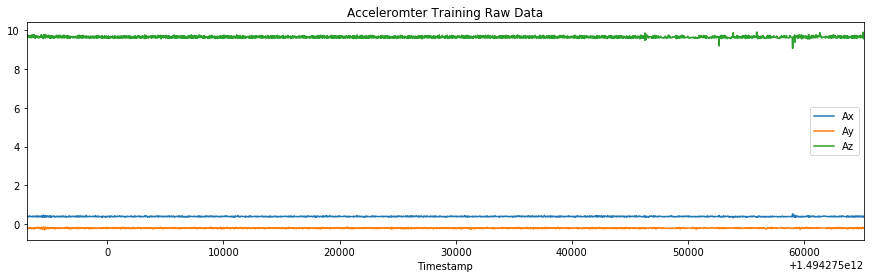

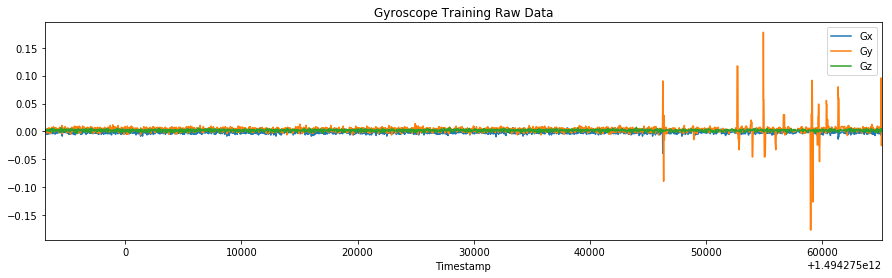

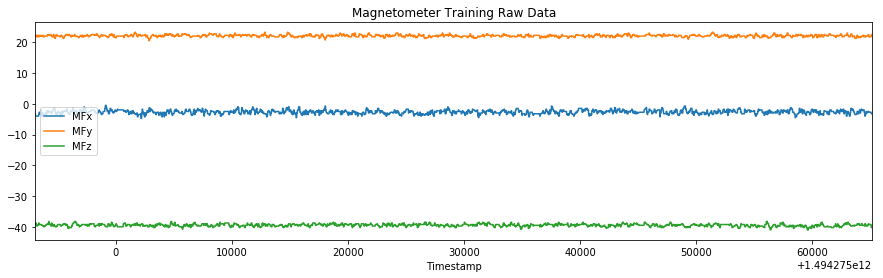

In [35]:
## Plot the Sensor Values 
data.plot(x='Timestamp',y=['Ax','Ay','Az'],title="Acceleromter Training Raw Data",figsize=(15.0, 4.0))
data.plot(x='Timestamp',y=['Gx','Gy','Gz'],title="Gyroscope Training Raw Data",figsize=(15.0, 4.0))
data.plot(x='Timestamp',y=['MFx','MFy','MFz'],title="Magnetometer Training Raw Data",figsize=(15.0, 4.0))


$\epsilon  = Y_{Earth} - R_{t}.Y_{Device}$

The Gauss-Newton method executes following iteration:

$ q_t = q_{t-1} - (J_{t}^T.J_{t})^{-1}.J_{t}^T.\epsilon$

To represent the $q_{t}\;at\;t=0$ we have $Q_{observation} = [0.5,0.5,0.5,0.5]$

In [36]:
## Initial Observation for Quaternion. 
Q_observation = np.matrix([[0.5], [0.5] , [0.5], [0.5]])
testObj = GaussNewtonOptimization(Q1=float(Q_observation[0]),
                                                     Q2=float(Q_observation[1]),
                                                     Q3=float(Q_observation[2]),
                                                     Q4=float(Q_observation[3]),
                                                     Ax=1,Ay=1,Az=1,
                                                     Mx=1,My=1,Mz=1)

In [37]:


Q_list = list()
QMatrix_list = list()
## Now we run the algorithm for all the values of the Accelerometer and Magnetometer. 
for i in range(len(data)):
    Ax = data['Ax'][i]; Ay = data['Ay'][i]; Az = data['Az'][i]
    Mx = data['MFx'][i]; My = data['MFy'][i]; Mz = data['MFz'][i]
    testObj = GaussNewtonOptimization(Q1=float(Q_observation[0]),
                                                     Q2=float(Q_observation[1]),
                                                     Q3=float(Q_observation[2]),
                                                     Q4=float(Q_observation[3]),
                                                     Ax=Ax,Ay=Ay,Az=Az,
                                                     Mx=Mx,My=My,Mz=Mz)
    #print("The Q_Now",testObj.Q_now)
    #print("The Q_Next",testObj.Gaussnewton())
    #NormValue = GaussNewtonOptimization.norm(testObj.Gaussnewton())
    #Q_observation = np.matrix([x/NormValue for x in testObj.Gaussnewton()]).transpose()
    tempx = testObj.Gaussnewton()
    QMatrix_list.append(tempx)
    Q_observation = list([float(tempx[0]), float(tempx[1]), float(tempx[2]), float(tempx[3])])
    Q_list.append(Q_observation)
    #print("Next set of Q_observation(normalised :)",Q_observation)
    #print("-------------------------------------------------------------------------")
   
        
        

In [38]:
q0 = list();q1= list();q2= list();q3= list()

# let us add it to data dataframe to make the plotting easier. 
for i in range(len(Q_list)):
    q0.append(Q_list[i][0])
    q1.append(Q_list[i][1])
    q2.append(Q_list[i][2])
    q3.append(Q_list[i][3])
    

In [39]:
data["q0"] = q0 ;data["q1"] = q1 ;data["q2"] = q2 ;data["q3"] = q3  

/home/omkar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [40]:
data.head(8)

,Timestamp,Ax,Ay,Az,Gx,Gy,Gz,MFx,MFy,MFz,q0,q1,q2,q3
0,1494274993079,0.421380,-0.191536,9.672575,0.000000,0.000000,0.000000,-3.25,22.00,-39.25,-1.290481,1.787433,0.005535,0.676066
1,1494274993101,0.402226,-0.191536,9.653421,0.002131,0.002131,0.003196,-4.00,22.25,-38.75,-1.295359,1.582821,0.084642,0.265368
2,1494274993126,0.402226,-0.172383,9.691729,-0.002131,0.001065,0.002131,-4.00,22.25,-38.75,0.450621,0.244311,0.137461,0.202629
3,1494274993147,0.383072,-0.229843,9.653421,0.002131,0.002131,0.002131,-4.00,22.25,-38.75,0.737718,-0.750252,-0.079959,0.034413
4,1494274993169,0.383072,-0.229843,9.730036,-0.002131,0.002131,0.001065,-4.00,21.75,-39.25,0.697578,-0.700762,-0.092012,0.043831
5,1494274993191,0.383072,-0.210690,9.653421,0.002131,0.004261,0.002131,-4.00,21.75,-39.25,0.738904,-0.731121,-0.111389,0.057634
6,1494274993218,0.402226,-0.210690,9.615114,0.001065,0.002131,0.001065,-4.00,22.25,-39.75,0.711181,-0.691054,-0.118226,0.065287
7,1494274993240,0.402226,-0.191536,9.691729,-0.005326,-0.003196,0.001065,-4.00,22.25,-39.75,0.743498,-0.711908,-0.133638,0.077000


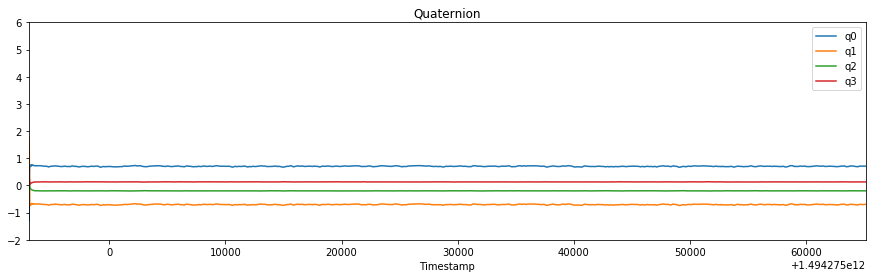

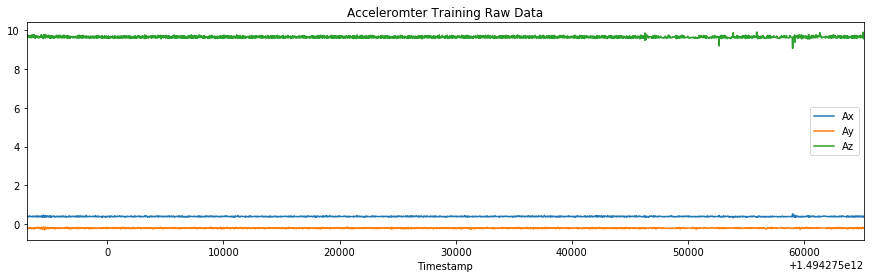

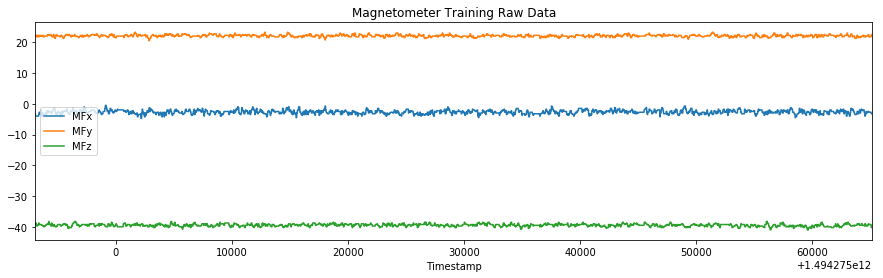

In [41]:
data.plot(x='Timestamp',y=['q0','q1','q2','q3'],title="Quaternion",figsize=(15.0, 4.0),ylim=(-2,6))
data.plot(x='Timestamp',y=['Ax','Ay','Az'],title="Acceleromter Training Raw Data",figsize=(15.0, 4.0))
#data.plot(x='Timestamp',y=['Gx','Gy','Gz'],title="Gyroscope Training Raw Data",figsize=(15.0, 4.0))
data.plot(x='Timestamp',y=['MFx','MFy','MFz'],title="Magnetometer Training Raw Data",figsize=(15.0, 4.0))

### Quaternion Output

Hence we get a decent output 

In [42]:
t1 = GaussNewtonOptimization(0.5,0.5,0.5,0.5,1.2,0.65,8.5,2.3,1.5,2.1)

In [43]:
t1.Gaussnewton

<bound method GaussNewtonOptimization.Gaussnewton of <__main__.GaussNewtonOptimization object at 0x7ff074c19fd0>>

In [44]:
print (t1.Gaussnewton.__doc__)


        Gauss Newton Algorithm : returns the Quaternion derived from Accelerometer and Magnetometer,
        iterated 10 times. 
        


In [45]:
t1.Gaussnewton()

(0.81390061081109089,
 -0.1354800591525446,
 0.36951932893885192,
 0.82181091516987204)